In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab as pl 

Definimos la función solución a la ecuacion de difución:

\begin{equation}
f(x,\Delta t | x_0) = \frac{1}{\sqrt{4\pi D \Delta t}}e^{-\frac{(x-x_0)^2}{4D\Delta t}}
\end{equation}

que es una distribución Gaussiana con varianza $\sigma^2 = 2D\Delta t$

In [2]:
def dif(dt,x,x_0,D):
    N = (1/np.sqrt(4*np.pi*D*dt))
    return N*np.exp(-np.divide(np.power((x-x_0),2),4*D*dt))

Introduciomos los valores constantes:

\begin{equation}
x_0 = 2 \quad t_0 = 0 \quad D = 1 
\end{equation}

para valores de tiempo:

\begin{equation}
t = 1 \\ t = 2 \\ t = 4 \\ t = 8 \\ t = 16 \\ t = 32
\end{equation}

In [3]:
t = np.array([1,2,4,8,16,32])
t_0 = 0
x_0 = 2
D = 1
dt = np.array(t)-t_0

Generamos una distribucion de puntos aleatorios para los distintos tiempos: 

In [4]:
psi = []
for i in range(len(dt)):
    psi.append(np.random.normal(0,1,1000))

Para actualizar la posición de una partícula (inicialmente en x_0 = 2 y t = 0) es incrementar $x_0$
por una cantidad:

\begin{equation}
x = x_0 + \Psi(\epsilon) \sqrt{2D\Delta t}
\end{equation}

donde $\Psi(\epsilon)$ es la muestra aleatoria de una distribución normal generada arriba con media igual a cero y varianza unitaria.

In [5]:
x = []
for i in range(len(dt)):
    a = [x_0]
    for j in range(1,len(psi[i])):
        a.append(a[0] + psi[i][j]*math.sqrt(2*D*(dt[i])))
    x.append(a)
x = np.array(x)

Ya generados los valores de x para los distintos t's, obtenemos la función $f(x,\Delta t|x_0)$

In [6]:
f = []
f_r = [] #para función analitica
x_r = np.linspace(np.min(x),np.max(x),1000) #para función analitica
for i in range(len(t)):
    f.append(dif(dt[i],x[i],x_0,D))
    f_r.append(dif(dt[i],x_r,x_0,D))
f = np.array(f)
f_r = np.array(f_r)

Graficamos los puntos obteidos:

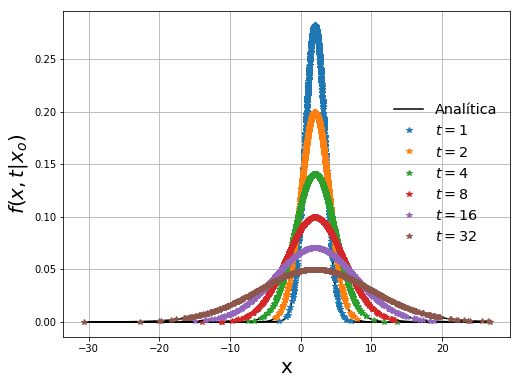

In [7]:
plt.figure(figsize=(8,6))
plt.plot(x_r,f_r[0],'k-',label='Analítica')
for i in range(len(f)):
    plt.plot(x_r,f_r[i],'k-')
    plt.plot(x[i],f[i],'*',label='$t={0}$'.format(t[i]))
plt.xlabel('x', fontsize = 20)
plt.ylabel('$f(x,t|x_o)$', fontsize = 20)
plt.grid()
plt.legend(loc='center right', shadow=True, frameon = False , fontsize='x-large')
pl.savefig('difu.pdf')